In [1]:
import cv2
import os
from ultralytics import YOLO
import pytesseract
import matplotlib.pyplot as plt
import easyocr
ocr_reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [2]:
yolo_model = YOLO(r"models/helmet_numplate_2.pt")

In [12]:
image = cv2.imread(r'testimages/new143.png')

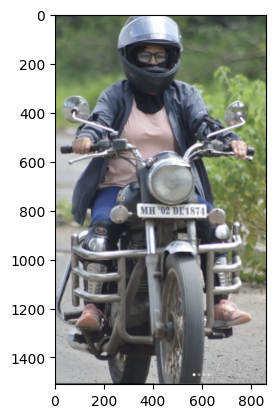

In [13]:
plt.imshow((cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))

In [14]:
def detect(image):
    detections = yolo_model(image)[0]
    for x in detections.boxes:
        x1, y1, x2, y2 = map(int, x.xyxy[0])  # Extract bounding box
        cls = int(x.cls[0])  # Get class ID
        print(cls,x1,y1,x2,y2)
        if cls == 0:  # Helmet class
            helmet_present = "Yes"
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, "Helmet", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        elif cls == 1:
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(image, "Num", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
            plate_roi = image[y1:y2, x1:x2]
            if plate_roi.size == 0:
                print("rio is empty")
            else:
                gray_plate = cv2.cvtColor(plate_roi, cv2.COLOR_BGR2GRAY)
                result = ocr_reader.readtext(gray_plate)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.axis("off")  # Hide axis
    plt.show()
    


0: 640x384 1 Helmet, 1 NumPlate, 75.3ms
Speed: 2.1ms preprocess, 75.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
0 217 2 551 327
1 327 762 626 855


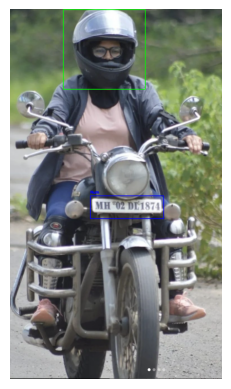

In [15]:
detect(image)

In [19]:
image = cv2.imread(r'testimages/new50.jpg')


0: 640x640 1 NumPlate, 150.1ms
Speed: 5.1ms preprocess, 150.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
1 264 327 333 357


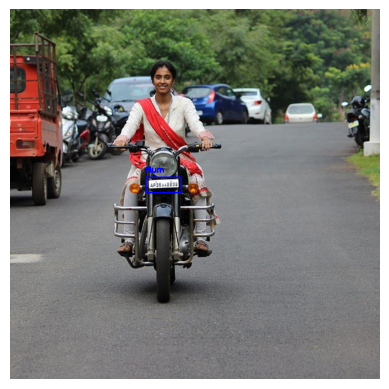

In [20]:
detect(image)